In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import math
from scipy import optimize

Consider 
$$
f_1(x) = f_2(x) = f(x) = \begin{cases}
\frac{x^2}{2}, & |x|< 1, \\
|x| - \frac{1}{2}, & \text{Otherwise}
\end{cases},
$$
and the stochastic gradient 
$$
g_1(x) = g_2(x) = g(x) = \begin{cases}
\nabla f(x) + \sqrt{|x|}, &\text{with probability 1/2}\\
\nabla f(x) - \sqrt{|x|}, &\text{with probability 1/2}
\end{cases}
$$

In [ ]:
print(np.random.rand())


: 

In [ ]:
def f(x):
    f_val = 0
    nf = 0
    if np.abs(x) < 1:
        f_val = x**2 / 2
        nf = x
    else:
        f_val = np.abs(x) - 1 / 2
        nf = np.sign(x)
    p = np.random.rand()
    if p <= 0.5:
        g = nf + np.sqrt(np.abs(x))
    else:
        g = nf - np.sqrt(np.abs(x))
    return f_val, g

def traj(x0, lr, Q, T, fopt):
    errs = []
    x = np.array([x0, x0])
    for it in range(T):
        for q in range(Q):
            f1v, g1 = f(x[0])
            f2v, g2 = f(x[1])
            x = x - lr * np.array([g1, g2])
        x_mean = np.mean(x)
        x = np.array([x_mean, x_mean])
        fv, _ = f(x_mean)
        errs.append(fv - fopt)
        # errs.append(np.linalg.norm(x_mean - fopt)**2)
    return errs        

UsageError: Line magic function `%` not found.


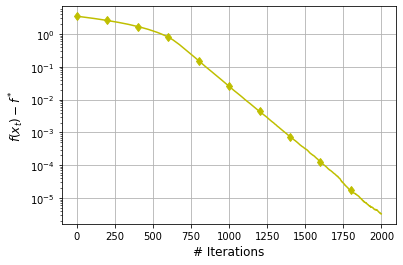

In [ ]:
### equal stepsize
T = 2000
Q = int(np.cbrt(T))
lr = 2 / np.sqrt(T) / Q * 0.1
x0 = 4
trajs = []
ntrail = 10
fopt = 0
temp = []
for nt in range(ntrail):
    temp.append(traj(x0, lr, Q, T, fopt))
trajs.append(np.mean(temp, axis=0))

mark_every = int(T * 0.1)
font = FontProperties()
font.set_size(18)
font2 = FontProperties()
font2.set_size(10)
plt.figure()
plt.plot(trajs[0], '-dy', markevery=mark_every)
plt.grid(True)
plt.yscale('log')
plt.xlabel('# Iterations', fontsize=12)
plt.ylabel(r'$f(x_t) - f^*$', fontsize=12)
% plt.savefig('res/ex.pdf',format='pdf', dpi=4000, bbox_inches='tight')
plt.show()

: 

Consider 
$$
f_1(x) = x^2, \ f_2(x) = \begin{cases}
\frac{(x-d)^2}{2}, & |x-d|< 1, \\
|x-d| - \frac{1}{2}, & \text{Otherwise}
\end{cases},
$$


In [ ]:
def f1(x, d):
    f_val = 0
    nf = 0
    if np.abs(x - d) < 1:
        f_val = (x-d)**2 / 2
        nf = x - d
    else:
        f_val = np.abs(x - d) - 1 / 2
        nf = np.sign(x - d)
    p = np.random.rand()
    return f_val, nf

def f2(x):
    return x**2, 2 * x

def f(x, d):
    f1v, gradf1 = f1(x, d)
    f2v, gradf2 = f2(x)
    return 0.5 * (f1v + f2v), 0.5 * (gradf1 + gradf2) 

def traj(x0, d, lr, sigma, Q, T, fopt):
    errs = []
    x = np.array([x0, x0])
    for it in range(T):
        for q in range(Q):
            f1v, gradf1 = f1(x[0], d)
            f2v, gradf2 = f2(x[1])
            g1 = gradf1 + np.random.normal(0, np.sqrt(sigma**2 + f1v))
            # g1 = gradf1 + np.random.normal(0, sigma)
            g2 = gradf2 + np.random.normal(0, np.sqrt(sigma**2 + f2v))
            x = x - lr * np.array([g1, g2])
        x_mean = np.mean(x)
        x = np.array([x_mean, x_mean])
        fv, _ = f(x_mean, d)
        errs.append(fv - fopt)
        # errs.append(np.linalg.norm(x_mean - fopt)**2)
    return errs        

UsageError: Line magic function `%` not found.


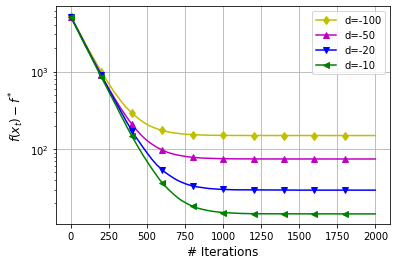

In [ ]:
### equal stepsize
T = 2000
Q = int(np.cbrt(T))
lr = 2 / np.sqrt(T) / Q * 0.1
ds = [-100, -50, -20, -10]
nd = len(ds)
sigma = 1
x0 = 100
trajs = []
ntrail = 1
for i in range(nd):
    def f_topt(x):
        fv, _ = f(x, ds[i])
        return fv
    fopt = optimize.fminbound(f_topt, -200, ds[i])
    # fopt = 0
    temp = []
    for nt in range(ntrail):
        temp.append(traj(x0, ds[i], lr, sigma, Q, T, fopt))
    trajs.append(np.mean(temp, axis=0))

mark_every = int(T * 0.1)
font = FontProperties()
font.set_size(18)
font2 = FontProperties()
font2.set_size(10)
plt.figure()
plt.plot(trajs[0], '-dy', markevery=mark_every)
plt.plot(trajs[1], '-^m', markevery=mark_every)
plt.plot(trajs[2], '-vb', markevery=mark_every)
plt.plot(trajs[3], '-<g', markevery=mark_every)
plt.grid(True)
plt.yscale('log')
plt.xlabel('# Iterations', fontsize=12)
plt.ylabel(r'$f(x_t) - f^*$', fontsize=12)
plt.legend(('d=' + str(ds[0]), 'd=' + str(ds[1]), 'd=' + str(ds[2]), 'd=' + str(ds[3])))
# plt.savefig('res/bgd_invariant.pdf',format='pdf', dpi=4000, bbox_inches='tight')
plt.show()

Consider 
$$
f_1(x) = (x-1)^2, f_2(x) = 2(x-3)^2
$$

In [ ]:
def f_1(x, d):
  return (x - d)**2, 2 * (x - d)

def f_2(x, d):
  return 2 * (x - d - 3)**2, 4 * (x - d - 3)

def f(x, d):
  f1, g1 = f_1(x, d)
  f2, g2 = f_2(x, d)
  return 0.5 * (f1 + f2), 0.5 * (g1 + g2)

def traj_d(x0, d, lr, sigma, Q, T, fopt):
    errs = []
    x = np.array([x0, x0])
    for it in range(T):
        for q in range(Q):
            f1v, gradf1 = f_1(x[0], d)
            f2v, gradf2 = f_2(x[1], d)
            g1 = gradf1 + np.random.normal(0, np.sqrt(sigma**2 + f1v))
            # g1 = gradf1 + np.random.normal(0, sigma)
            g2 = gradf2 + np.random.normal(0, np.sqrt(sigma**2 + f2v))
            x = x - lr * np.array([g1, g2])
        x_mean = np.mean(x)
        x = np.array([x_mean, x_mean])
        fv, _ = f(x_mean, d)
        errs.append(fv - fopt)
        # errs.append(np.linalg.norm(x_mean - fopt)**2)
    return errs   

     

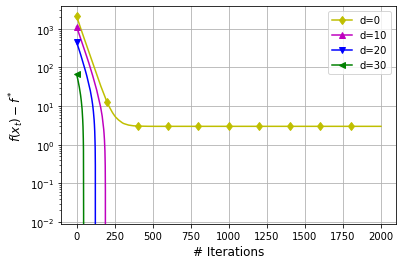

In [ ]:
### equal stepsize
T = 2000
Q = int(np.cbrt(T))
lr = 2 / np.sqrt(T) / Q * 0.1
ds = [0, 10, 20, 30]
nd = len(ds)
sigma = 0.1
x0 = 40
trajs = []
ntrail = 1
for i in range(nd):
    def f_topt(x):
        fv, _ = f(x, ds[i])
        return fv
    fopt = optimize.fminbound(f_topt, -ds[i], ds[i])
    # fopt = 0
    temp = []
    for nt in range(ntrail):
        temp.append(traj_d(x0, ds[i], lr, sigma, Q, T, fopt))
    trajs.append(np.mean(temp, axis=0))

mark_every = int(T * 0.1)
font = FontProperties()
font.set_size(18)
font2 = FontProperties()
font2.set_size(10)
plt.figure()
plt.plot(trajs[0], '-dy', markevery=mark_every)
plt.plot(trajs[1], '-^m', markevery=mark_every)
plt.plot(trajs[2], '-vb', markevery=mark_every)
plt.plot(trajs[3], '-<g', markevery=mark_every)
plt.grid(True)
plt.yscale('log')
plt.xlabel('# Iterations', fontsize=12)
plt.ylabel(r'$f(x_t) - f^*$', fontsize=12)
plt.legend(('d=' + str(ds[0]), 'd=' + str(ds[1]), 'd=' + str(ds[2]), 'd=' + str(ds[3])))
# plt.savefig('res/bgd_invariant.pdf',format='pdf', dpi=4000, bbox_inches='tight')
plt.show()